<a href="https://colab.research.google.com/github/mostafa12H/Admin_dashbooard/blob/main/Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: moustafa hamada

ID: 55-4254

Tutorial: T-06

---

Name: Adam Mohamed

ID: 55-10644


Tutorial: t-06

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()

print(df['odometer'].head())
print(df['sellingprice'].head())
print(df['make'].unique())

print(df['make'].nunique())
print(df['body'].unique())
print(df['transmission'].unique())
print(df['state'].unique())
print(df['interior'].unique())
print(df['year'].unique())
print(df['model'].unique())
print(df['trim'].unique())
print(df['condition'].unique())
print(df['color'].unique())
print(df['seller'].unique())
print(df['saledate'].unique())


missing_values = df.isnull().sum()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB
0     50404.0mi
1     17846.0mi
2     21122.0mi
3    145303.0mi
4      6714.0mi
Name: odometer, d

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


We started by getting a general overview of the dataset using df.info(), which told us that the dataset has 46,578 rows and 15 columns. Most of the columns were correctly identified, but some important ones, like odometer and sellingprice, were not. They were marked as "object" types because they contained non-numeric characters, like "mi" in odometer and "$" in sellingprice. To fix this, we knew we needed to clean these columns by removing the extra characters and converting them into numbers (float) so we could properly analyze them.

To make sure of what was inside these columns, we printed the first few entries of odometer and sellingprice, which confirmed that they had units and symbols that needed to be removed. Next, we looked at some of the categorical columns, like make, body, and transmission, which helped us see the variety of car brands, body types, and transmissions in the data. For example, there were 48 different car brands, and body types ranged from "sedan" and "SUV" to different truck types.

This step was really helpful in showing us the structure of the data and what needed to be cleaned or simplified. We also checked for any missing values and looked at some basic statistics with df.describe() to guide us in cleaning the data before moving on to deeper analysis and modeling.

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# Body mapping dictionary
body_mapping = {
    'sedan': 'sedan',
    'coupe': 'coupe',
    'convertible': 'convertible',
    'hatchback': 'hatchback',
    'suv': 'suv',
    'minivan': 'minivan',
    'wagon': 'wagon',
    'van': 'minivan',
    'e-series van': 'minivan',
    'promaster cargo van': 'minivan',
    'supercrew': 'pickup truck',
    'crew cab': 'pickup truck',
    'double cab': 'pickup truck',
    'extended cab': 'pickup truck',
    'regular cab': 'pickup truck',
    'king cab': 'pickup truck',
    'quad cab': 'pickup truck',
    'access cab': 'pickup truck',
    'crewmax cab': 'pickup truck',
    'mega cab': 'pickup truck',
    'supercab': 'pickup truck',
    'g sedan': 'sedan',
    'g convertible': 'convertible',
    'g coupe': 'coupe',
    'beetle convertible': 'convertible',
    'genesis coupe': 'coupe',
    'elantra coupe': 'coupe',
    'q60 convertible': 'convertible',
    'regular-cab': 'pickup truck',
    'xtracab': 'pickup truck',
    'club cab': 'pickup truck',
    'cab plus 4': 'pickup truck',
    'cts coupe': 'coupe',
    'cts wagon': 'wagon',
    'granturismo convertible': 'convertible',
    'tsx sport wagon': 'wagon',
    'cts-v coupe': 'coupe',
    'q60 coupe': 'coupe',
    'transit van': 'minivan',
    'g37 convertible': 'convertible',
    'koup': 'coupe'
}



# Ensure odometer column contains strings before replacing and converting to float
df['odometer'] = df['odometer'].astype(str).str.replace('mi', '').astype(float)
print(df['odometer'].head())

# Ensure sellingprice column contains strings before replacing and converting to float
df['sellingprice'] = df['sellingprice'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)
print(df['sellingprice'].head())

# Clean the saledate field and parse the datetime correctly (remove the timezone)
df['saledate_cleaned'] = df['saledate'].str.slice(0, 24)  # Remove the timezone portion
df['saledate'] = pd.to_datetime(df['saledate_cleaned'], format='%a %b %d %Y %H:%M:%S', errors='coerce')

# Drop the temporary cleaned column
df.drop(columns=['saledate_cleaned'], inplace=True)
print(df['saledate'].head())

# Ensure body column is lowercased and replaced based on the mapping
df['body'] = df['body'].str.lower().replace(body_mapping)
print(df['body'].unique())

# Replace any missing or ambiguous color and interior values
df['color'] = df['color'].replace('—', df['color'].mode()[0])
df['interior'] = df['interior'].replace('—', df['interior'].mode()[0])

# Extract year, month, and day of the week from the sale date
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_dayofweek'] = df['saledate'].dt.dayofweek

# Log transformation of selling price
df['log_sellingprice'] = np.log(df['sellingprice'] + 1)

# Bin the odometer values into categories
df['odometer_bin'] = pd.cut(df['odometer'],
                            bins=[0, 20000, 60000, 100000, np.inf],
                            labels=['low', 'medium', 'high', 'very high'])

# Bin the condition values into categories
df['condition_group'] = pd.cut(df['condition'],
                               bins=[0, 2, 4, 5],
                               labels=['low', 'medium', 'high'])

# Print the transformations
print(df[['odometer', 'sellingprice', 'saledate', 'body', 'log_sellingprice', 'odometer_bin', 'condition_group']].head())

0     50404.0
1     17846.0
2     21122.0
3    145303.0
4      6714.0
Name: odometer, dtype: float64
0    10900.0
1    29900.0
2    24200.0
3     3200.0
4    22100.0
Name: sellingprice, dtype: float64
0   2015-06-02 02:30:00
1   2015-02-18 07:15:00
2   2015-01-20 01:30:00
3   2015-03-04 07:10:00
4   2015-02-18 06:45:00
Name: saledate, dtype: datetime64[ns]
['sedan' 'suv' 'minivan' 'pickup truck' 'wagon' 'coupe' 'convertible'
 'hatchback']
   odometer  sellingprice            saledate     body  log_sellingprice  \
0   50404.0       10900.0 2015-06-02 02:30:00    sedan          9.296610   
1   17846.0       29900.0 2015-02-18 07:15:00      suv         10.305647   
2   21122.0       24200.0 2015-01-20 01:30:00    sedan         10.094149   
3  145303.0        3200.0 2015-03-04 07:10:00      suv          8.071219   
4    6714.0       22100.0 2015-02-18 06:45:00  minivan         10.003378   

  odometer_bin condition_group  
0       medium          medium  
1          low            high  
2

In this stage of the data cleaning, we successfully transformed and organized several key columns. The odometer and sellingprice columns were cleaned and converted to numerical values, making them ready for analysis. This ensures that we can now work with these features for statistical models and comparisons without issues from non-numeric characters like "mi" or "$".

Next, we fixed the saledate column by removing unnecessary timezone information, which allowed us to convert the dates into a proper datetime format. Now, we can extract additional date-related features or explore trends based on the sale dates.

The body column was also standardized by grouping specific car body types (like different truck cab types) into more general categories such as "sedan," "SUV," and "pickup truck." This simplifies analysis and reduces noise in the dataset.

We also applied a log transformation to the sellingprice to handle the large range in car prices. This reduces the effect of extreme price values and makes the data more manageable. In addition, we categorized the odometer readings into groups: "low," "medium," "high," and "very high" mileage, which helps us quickly understand how different mileage groups affect the selling price. Lastly, the car condition was also grouped into three categories—"low," "medium," and "high"—for easier comparison and analysis.

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

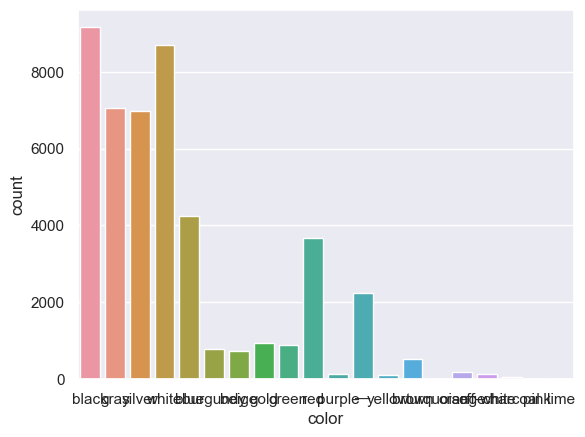

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

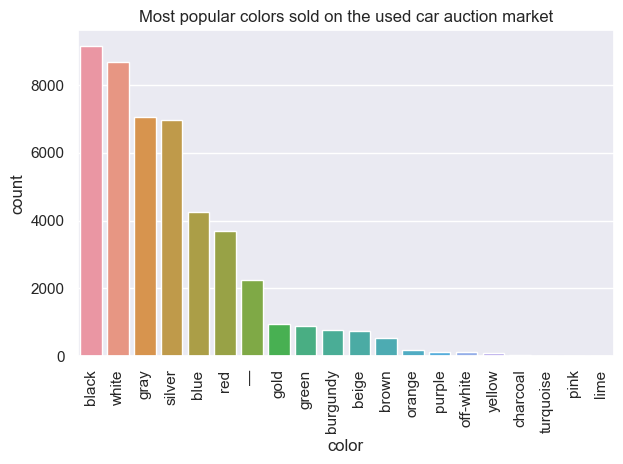

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

make
Ford         7871
Chevrolet    5322
Nissan       4297
Name: count, dtype: int64


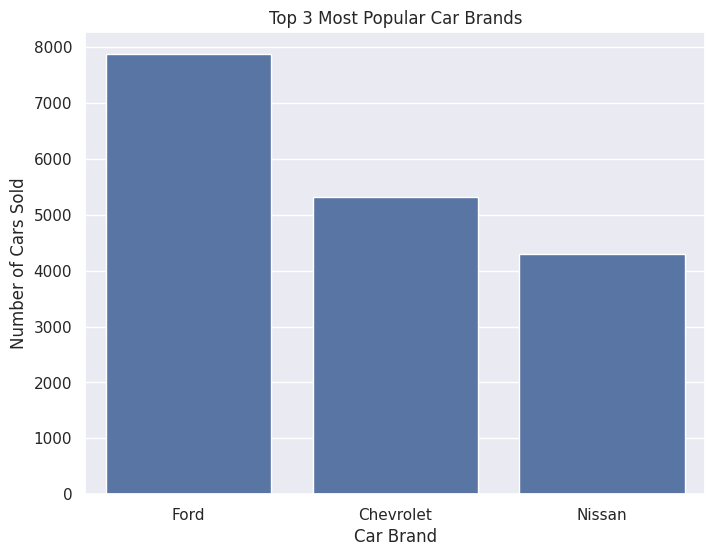

In [ ]:

# Find the top 3 most popular car brands by counting the occurrences of each brand in the 'make' column
popular_brands = df['make'].value_counts().head(3)

# Print the top 3 most popular car brands and their counts
print(popular_brands)

# Create a bar plot to visualize the top 3 most popular car brands
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.barplot(x=popular_brands.index, y=popular_brands.values)  # Create a bar plot using the brand names as x-axis and their counts as y-axis
plt.title('Top 3 Most Popular Car Brands')  # Add a title to the plot
plt.xlabel('Car Brand')  # Label the x-axis
plt.ylabel('Number of Cars Sold')  # Label the y-axis
plt.show()  # Display the plot


**Answer for Q1**: 1) Ford 2) Chevrolet 3) Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

transmission
automatic    13761.075476
manual       11181.775758
Name: sellingprice, dtype: float64


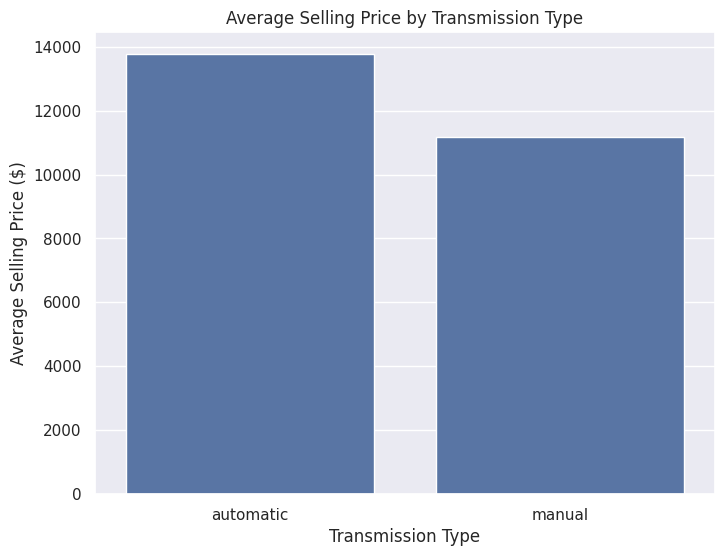

In [ ]:

# Calculate the average selling price for each transmission type by grouping the data based on 'transmission'
# and then taking the mean of the 'sellingprice' column for each group
avg_price_by_transmission = df.groupby('transmission')['sellingprice'].mean()

# Print the calculated average selling price for each transmission type
print(avg_price_by_transmission)

# Create a bar plot to visualize the average selling price by transmission type
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.barplot(x=avg_price_by_transmission.index, y=avg_price_by_transmission.values)  # Create a bar plot with transmission types on the x-axis and average prices on the y-axis
plt.title('Average Selling Price by Transmission Type')  # Add a title to the plot
plt.xlabel('Transmission Type')  # Label the x-axis
plt.ylabel('Average Selling Price ($)')  # Label the y-axis with the average selling price in dollars
plt.show()  # Display the plot


**Answer for Q2**:.




* Automatic cars have an average selling price of $13,761.08.

* Manual cars have an average selling price of $11,181.78.


 automatic cars sell for a higher price than manual cars on average based on this dataset. Automatic cars are approximately $2,579 more expensive than manual cars on average.



**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

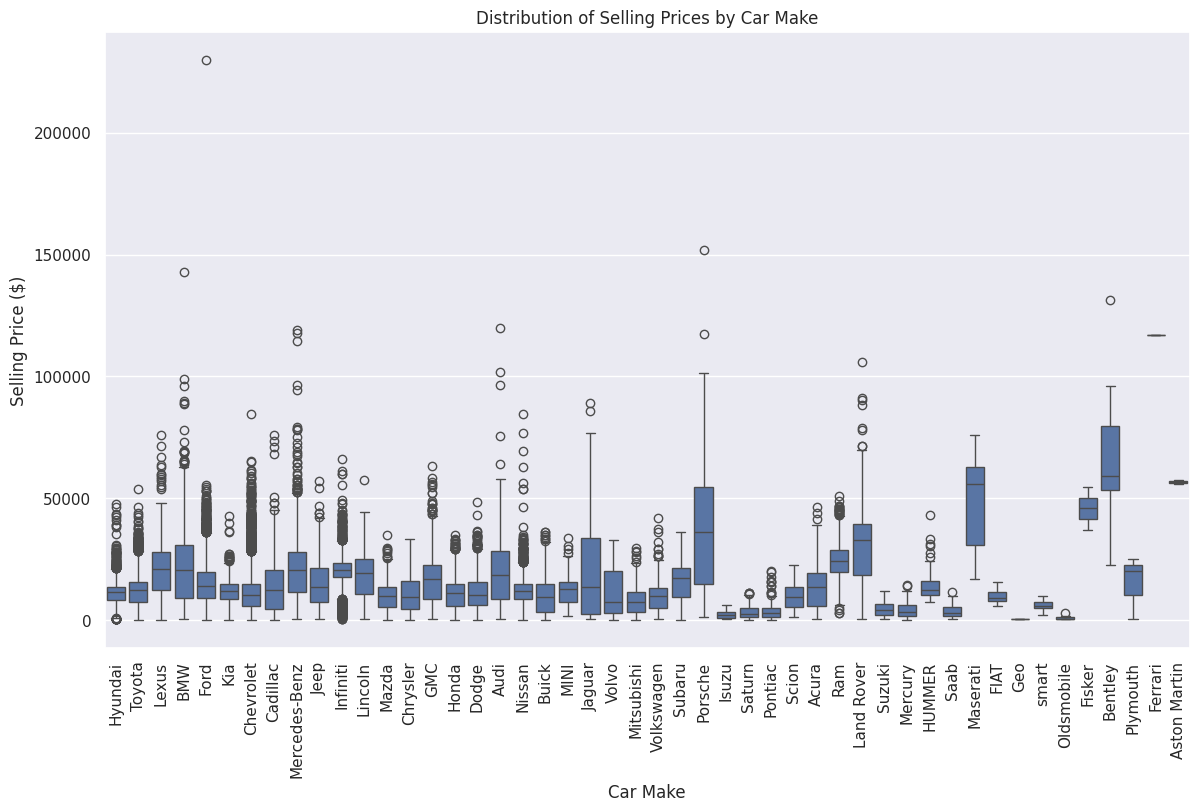

Car Makes with the Widest Distribution of Selling Price:
              iqr
make             
Porsche   39800.0
Maserati  31875.0

Car Makes that are the Most Expensive:
           median
make             
Ferrari  117000.0
Bentley   59250.0


In [ ]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='make', y='sellingprice', data=df)
plt.title('Distribution of Selling Prices by Car Make')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Selling Price ($)')
plt.show()

df_grouped = df.groupby('make')['sellingprice'].agg(['min', 'max', 'median', 'std', 'mean', 'count'])
df_grouped['iqr'] = df.groupby('make')['sellingprice'].quantile(0.75) - df.groupby('make')['sellingprice'].quantile(0.25)

# Display the makes with the widest distribution of selling price (based on IQR)
widest_distribution = df_grouped.nlargest(2, 'iqr')
print("Car Makes with the Widest Distribution of Selling Price:")
print(widest_distribution[['iqr']])

# Display the two most expensive makes based on median selling price
most_expensive = df_grouped.nlargest(2, 'median')
print("\nCar Makes that are the Most Expensive:")
print(most_expensive[['median']])

In this part of the analysis, we first created a box plot to visualize the distribution of selling prices for each car make. This allows us to easily see how car prices vary across different brands and identify any outliers or broad price ranges within each make. The box plot provides a clear visual representation of the price spread, showing how much prices can fluctuate for certain brands.

Next, we calculated important statistics for each car make, such as the minimum, maximum, median, mean, and standard deviation of selling prices. We also calculated the interquartile range (IQR), which measures the spread of the middle 50% of the prices. This helps us identify which car brands have the widest price range.

From this analysis, we found that Porsche and Maserati have the widest distribution of prices, with Porsche showing an IQR of $39,800 and Maserati with $31,875. This suggests that these brands have a wide variety of models, with significant differences in their prices. Additionally, Ferrari and Bentley stood out as the most expensive brands based on the median selling price, with Ferrari at $117,000 and Bentley at $59,250.

By identifying the brands with the widest price ranges and the highest median prices, we gain valuable insights into how car prices differ across brands, especially luxury brands like Ferrari, Bentley, Porsche, and Maserati. This helps understand which makes tend to have more expensive or diverse price offerings in the used car market.

**Answer for Q3**:



1.  Car Makes with the Widest Distribution of Selling Prices:

      1.   Porsche
      2.  Maserati


2.    Most Expensive Cars :

    1.   Ferrari
    2.   Bentley   







** **bold text**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

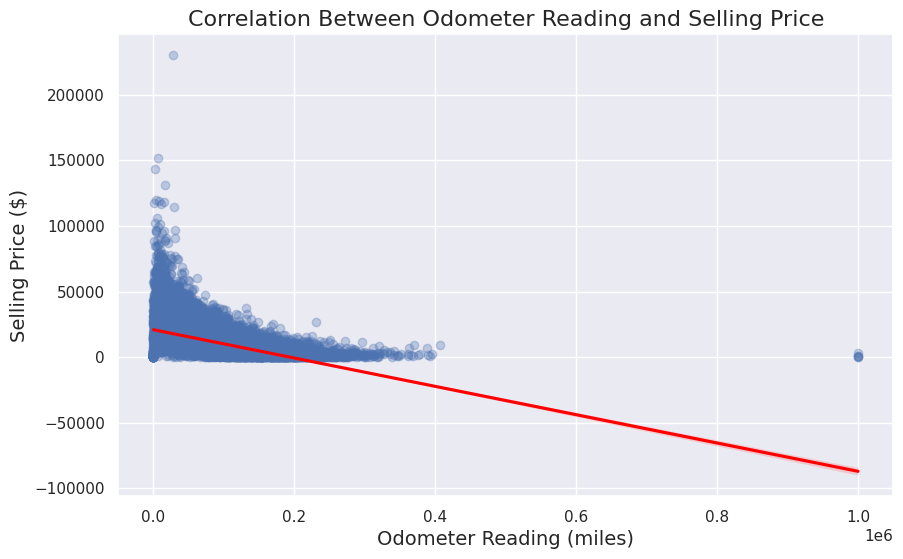

Correlation coefficient between odometer and selling price: -0.58


In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line to show the relationship between odometer reading and selling price
# scatter_kws={'alpha':0.3} makes the scatter points more transparent for better visibility
# line_kws={"color":"red"} specifies that the regression line should be red
sns.regplot(x='odometer', y='sellingprice', data=df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})

# Add a title and labels to the plot with specific font sizes for better readability
plt.title('Correlation Between Odometer Reading and Selling Price', fontsize=16)
plt.xlabel('Odometer Reading (miles)', fontsize=14)
plt.ylabel('Selling Price ($)', fontsize=14)

# Display the plot
plt.show()

# Calculate the correlation coefficient between odometer and selling price
# This tells us how strongly the two variables are related (negative correlation expected)
correlation = df['odometer'].corr(df['sellingprice'])

# Print the correlation coefficient, rounded to two decimal places
print(f"Correlation coefficient between odometer and selling price: {correlation:.2f}")


**Answer for Q4**:There is a clear negative correlation between odometer reading and selling price, with a correlation coefficient of -0.58. This means that higher mileage generally leads to a lower sale price. The downward slope of the regression line highlights this trend. While a few outliers with extreme mileage may be affecting the results slightly, the overall data confirms that cars with more miles tend to sell for less.

> Add blockquote



**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

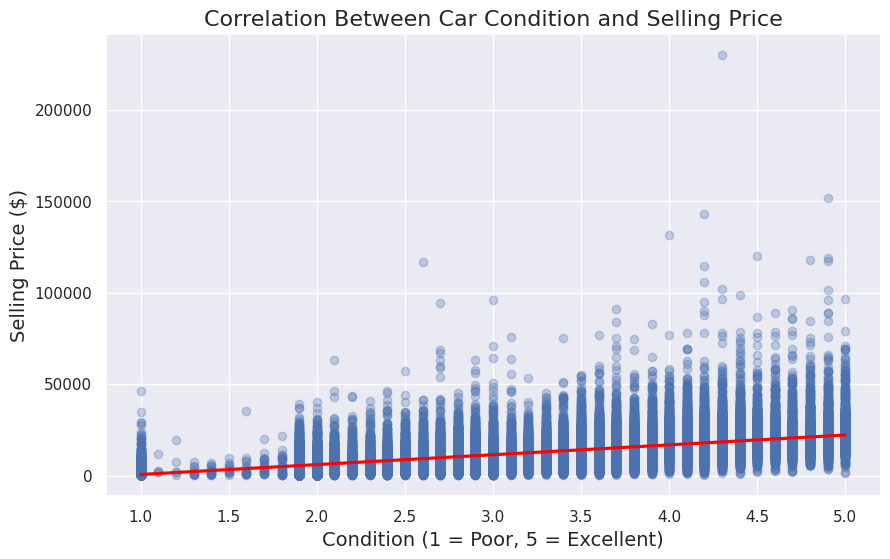

Correlation coefficient between car condition and selling price: 0.53


In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line to show the relationship between car condition and selling price
# scatter_kws={'alpha':0.3} makes the scatter points more transparent for better visibility
# line_kws={"color":"red"} specifies the color of the regression line to be red
sns.regplot(x='condition', y='sellingprice', data=df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})

# Add a title and labels to the plot with specific font sizes for better readability
plt.title('Correlation Between Car Condition and Selling Price', fontsize=16)
plt.xlabel('Condition (1 = Poor, 5 = Excellent)', fontsize=14)
plt.ylabel('Selling Price ($)', fontsize=14)

# Display the plot
plt.show()

# Calculate the correlation coefficient between car condition and selling price
# This tells us how strongly the two variables are related
correlation_condition = df['condition'].corr(df['sellingprice'])

# Print the correlation coefficient, rounded to two decimal places
print(f"Correlation coefficient between car condition and selling price: {correlation_condition:.2f}")


**Answer for Q5**: There is a moderate positive correlation between car condition and selling price, with a correlation coefficient of 0.53. As the condition rating improves, the selling price tends to increase, indicating that cars in better condition generally sell for more. The upward trend in the line of best fit supports this relationship. However, the correlation is moderate, suggesting that while condition is an important factor, other variables also play a significant role in determining a car's sale price.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

body
pickup truck    17981.766407
convertible     17581.563278
coupe           16538.921097
suv             16221.941270
minivan         11981.053571
sedan           11861.795912
hatchback       10320.636123
wagon            9872.678720
Name: sellingprice, dtype: float64


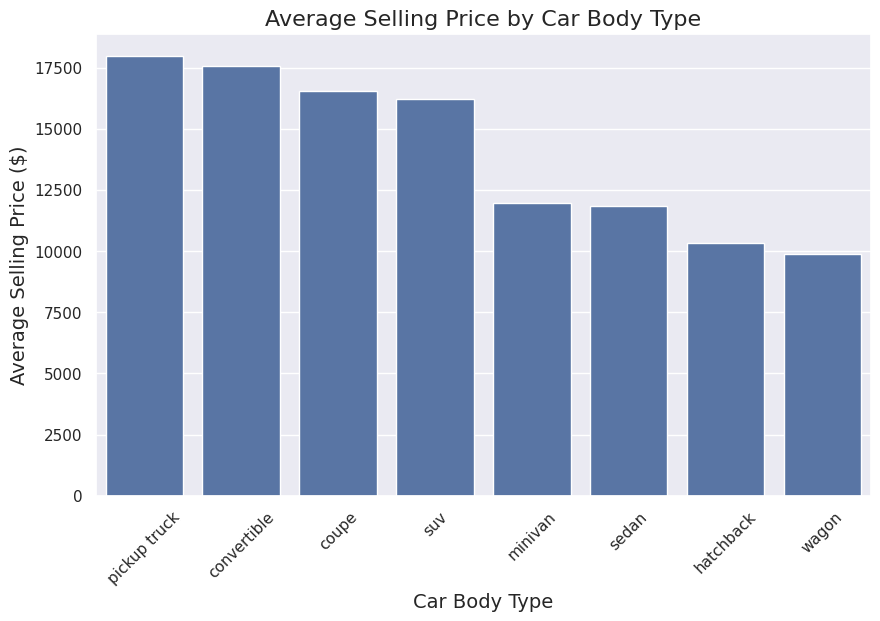

In [ ]:

# Group the data by 'body' (car body type), calculate the mean selling price for each body type,
# and sort the results in descending order (from highest to lowest average price)
avg_price_by_body = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)

# Print the calculated average selling prices for each car body type
print(avg_price_by_body)

# Create a figure for the bar plot and set the size to 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Create a bar plot to display the average selling price for each car body type
# x-axis will show the car body types, and y-axis will show the average selling prices
sns.barplot(x=avg_price_by_body.index, y=avg_price_by_body.values)

# Add a title and axis labels with specific font sizes for readability
plt.title('Average Selling Price by Car Body Type', fontsize=16)
plt.xlabel('Car Body Type', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)

# Rotate the labels on the x-axis by 45 degrees to avoid overlapping and improve readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


**Answer for Q6**:


Yes, there are clear differences in the average car price based on the car's body type. Pickup trucks have the highest average selling price at $17,981.77

making them the most expensive body type, followed closely by convertibles and coupes. On the other hand, the least expensive body type is wagons, with an average selling price of $9,872.68. This shows that the type of car body significantly impacts its resale value, with larger, more versatile vehicles like pickup trucks commanding higher prices, while smaller or less in-demand types like wagons and hatchbacks tend to sell for less.



---




Rank of Car Body Types by Average Selling Price:

 1.Pickup Truck: $17,981.

 2.Convertible: $17,581.56

 3.Coupe: $16,538.92

 4.SUV: $16,221.94

 5.Minivan: $11,981.05

 6.Sedan: $11,861.80

 7.Hatchback: $10,320.64

 8.Wagon: $9,872.68



## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df_encoded = pd.get_dummies(df, columns=['make', 'body', 'transmission'], drop_first=True)
df_encoded.head()

X = df_encoded[['year', 'odometer', 'condition'] + [col for col in df_encoded.columns if 'make_' in col or 'body_' in col or 'transmission_' in col]]

y = df_encoded['sellingprice']
print("Selected Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Selected Features (X):
   year  odometer  condition  make_Aston Martin  make_Audi  make_BMW  \
0  2013   50404.0        3.9              False      False     False   
1  2014   17846.0        4.9              False      False     False   
2  2012   21122.0        4.1              False      False     False   
3  2002  145303.0        1.9              False      False      True   
4  2014    6714.0        4.9              False      False     False   

   make_Bentley  make_Buick  make_Cadillac  make_Chevrolet  ...  make_Volvo  \
0         False       False          False           False  ...       False   
1         False       False          False           False  ...       False   
2         False       False          False           False  ...       False   
3         False       False          False           False  ...       False   
4         False       False          False           False  ...       False   

   make_smart  body_coupe  body_hatchback  body_minivan  body_pickup 

In this step, we applied one-hot encoding to convert the categorical variables like make, body, and transmission into numerical format using pd.get_dummies(). This was necessary because machine learning models, such as the Multiple Linear Regression model we chose, require all input features to be numeric. One-hot encoding creates binary (0/1) columns for each category, allowing the model to differentiate between various car makes, body types, and transmission types. We also used the drop_first=True parameter to avoid the dummy variable trap, which prevents redundancy and multicollinearity by removing one category from each set of new columns.

After encoding, we selected the necessary columns for features (X), including year, odometer, condition, and the encoded categorical columns, and set the selling price as the target variable (y). To ensure that the model's performance is evaluated on unseen data, we split the dataset into training and testing sets using the train_test_split function with an 80/20 ratio. This means that 80% of the data is used for training the model, while 20% is reserved for testing it. We chose this split to balance having enough data for training while ensuring the model is tested on a reasonable portion of data to check its generalization performance. The random_state=42 was set to maintain consistency in the split, allowing reproducibility of the results.

The output shows the first few rows of the selected features (X) and the target variable (y) after preprocessing. In the features (X), we have columns like year, odometer, and condition along with the one-hot encoded columns representing the car's make, body, and transmission types (e.g., make_Aston Martin, body_sedan, transmission_manual). The boolean values (True/False) in these columns indicate whether the car belongs to that specific category. For example, in the first row, the car is a sedan (body_sedan=True) but not an Aston Martin (make_Aston Martin=False). The target variable (y) represents the selling price of the car. The first few values of y (e.g., 10900.0, 29900.0, etc.) show the actual prices we are trying to predict using our model. Additionally, the train-test split output confirms the shape of the training set (X_train and y_train) and the test set (X_test and y_test). We have 37,262 rows in the training set and 9,316 rows in the test set, reflecting the 80/20 split we applied, which helps us evaluate the model's performance on unseen data.

## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Sample Predictions:")
print(y_pred[:5])


Sample Predictions:
[24380.48175165 10064.49227327 10872.51499258 -2579.9498208
  2244.77677713]


In this section, we used the LinearRegression model from the sklearn library to predict car prices based on the features we selected earlier. The Linear Regression model is a good fit for this problem because it helps us understand the relationship between multiple independent variables (such as car year, odometer, and condition) and the dependent variable (the selling price). This model attempts to find the best-fitting line that minimizes the difference between the predicted and actual prices, making it suitable for predicting continuous values like car prices.

After initializing the model using LinearRegression(), we fit the model to the training data using model.fit(X_train, y_train). This process involves the model learning the relationships between the input features (X_train) and the target variable (y_train). Once the model was trained, we used it to make predictions on the test data with model.predict(X_test), generating predicted prices for the cars in the test set.

The printed output shows the first five predicted selling prices for the cars in the test set. For example, the first predicted price is around $24,380, while others vary significantly, even including a negative value (-$2,579). A negative prediction is a sign that the model might need further adjustments, as car prices cannot be negative. This suggests that while the model is performing predictions, it may still require tuning or additional adjustments (like handling outliers or improving data quality) to provide more accurate and realistic predictions.

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

Mean Squared Error (MSE): 31478542.31
R-squared: 0.67


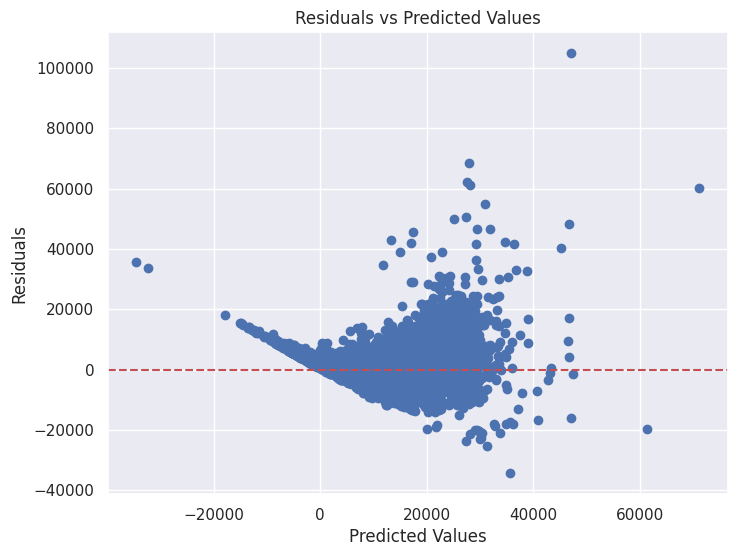

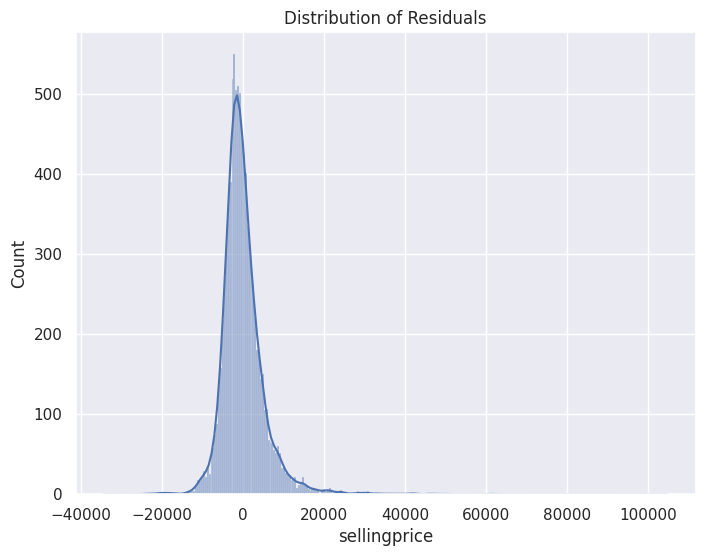

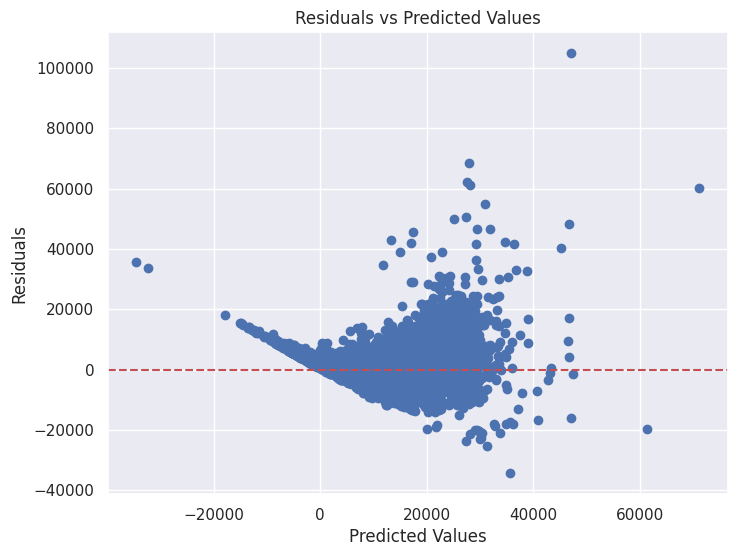

Adjusted R-squared: 0.67


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE) between the actual and predicted prices.
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score, which represents how well the model explains the variability of the data.
r2 = r2_score(y_test, y_pred)

# Print the Mean Squared Error and R-squared values to evaluate model performance.
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Compute residuals, which are the differences between the actual values and the predicted values.
residuals = y_test - y_pred

# Plotting the residuals against the predicted values to check if they are randomly distributed (ideal case).
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)  # Scatter plot of predicted values vs residuals
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title("Residuals vs Predicted Values")  # Set plot title
plt.xlabel("Predicted Values")  # X-axis label
plt.ylabel("Residuals")  # Y-axis label
plt.show()

# Plot the distribution of residuals using a histogram to check if they follow a normal distribution (a sign of a well-fitted model).
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)  # Plot histogram of residuals with a KDE (smoothed curve)
plt.title("Distribution of Residuals")  # Set plot title
plt.show()

# Scatter plot of residuals vs predicted values again (seems like a duplicate plot).
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)  # Scatter plot of predicted values vs residuals
plt.axhline(0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title("Residuals vs Predicted Values")  # Set plot title
plt.xlabel("Predicted Values")  # X-axis label
plt.ylabel("Residuals")  # Y-axis label
plt.show()

# Calculate the Adjusted R-squared, which adjusts the R-squared value based on the number of predictors (p) and samples (n).
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of predictors (features) used in the model
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Formula for adjusted R-squared

# Print the Adjusted R-squared value, which penalizes for adding too many predictors that may not improve the model.
print(f"Adjusted R-squared: {adjusted_r2:.2f}")


The residuals vs. predicted values plot shows the residuals (differences between actual and predicted prices) plotted against the predicted values. Ideally, residuals should be randomly scattered around the horizontal zero line, but in this case, there's a clear funnel shape, indicating heteroscedasticity (the error variance is not constant). This means the model struggles to predict prices accurately across the full price range, underpredicting lower prices and overpredicting higher ones. This suggests the linear regression model may not be suitable for this data, particularly for more expensive cars.

The distribution of residuals (histogram) shows that the residuals are right-skewed and not symmetrically centered around zero, which suggests the model has systematic biases—especially underpredicting higher car prices. There are also a few extreme residuals, meaning that for some cars, the model either greatly overestimated or underestimated the price.

To improve this model, you could consider addressing heteroscedasticity by further transforming variables or using a more complex, non-linear model such as random forest regression or XGBoost, which handle these issues better. Additionally, regularization techniques like Ridge or Lasso regression could be applied to reduce the effect of extreme variance. Investigating and handling outliers more carefully would also help improve performance, as extreme values can distort the model’s predictions.

In summary, the linear regression model currently shows significant issues with uneven error distribution and non-normal residuals, indicating that it may not be the best choice for predicting used car prices. Refining the model or using a non-linear model could lead to more accurate and reliable predictions for a dealership.

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:


The linear regression model produced a Mean Squared Error (MSE) of $31,478,542.31, indicating a significant gap between the predicted and actual prices. The R-squared value of 0.67 shows that the model explains 67% of the variability in car prices, which is moderate but leaves room for improvement.

Issues such as outliers and increasing variance at higher price ranges are evident in the residuals, which are not randomly scattered. Extreme values likely distort the model’s predictions, and the residuals also show a non-normal distribution, suggesting that some model assumptions are still violated.

To improve the model, addressing outliers in key features like mileage and price could reduce prediction errors. Additionally, using cross-validation would provide a more reliable estimate of the model’s performance, and applying regularization techniques like Ridge or Lasso could help mitigate overfitting and improve robustness.

At its current level of performance, the model provides a reasonable baseline for predicting used car prices but is not reliable enough for business decisions. Refining the model with these improvements is necessary to achieve more accurate and consistent predictions.


---
Bonus : importing and Data inspection and preprocessing

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()
df.tail()
df.info()

print(df['odometer'].head())
print(df['sellingprice'].head())
print(df['make'].unique())

print(df['make'].nunique())
print(df['body'].unique())
print(df['transmission'].unique())
print(df['state'].unique())
print(df['interior'].unique())
print(df['year'].unique())
print(df['model'].unique())
print(df['trim'].unique())
print(df['condition'].unique())
print(df['color'].unique())
print(df['seller'].unique())
print(df['saledate'].unique())


missing_values = df.isnull().sum()
df.describe()

# Body mapping dictionary
body_mapping = {
    'sedan': 'sedan',
    'coupe': 'coupe',
    'convertible': 'convertible',
    'hatchback': 'hatchback',
    'suv': 'suv',
    'minivan': 'minivan',
    'wagon': 'wagon',
    'van': 'minivan',
    'e-series van': 'minivan',
    'promaster cargo van': 'minivan',
    'supercrew': 'pickup truck',
    'crew cab': 'pickup truck',
    'double cab': 'pickup truck',
    'extended cab': 'pickup truck',
    'regular cab': 'pickup truck',
    'king cab': 'pickup truck',
    'quad cab': 'pickup truck',
    'access cab': 'pickup truck',
    'crewmax cab': 'pickup truck',
    'mega cab': 'pickup truck',
    'supercab': 'pickup truck',
    'g sedan': 'sedan',
    'g convertible': 'convertible',
    'g coupe': 'coupe',
    'beetle convertible': 'convertible',
    'genesis coupe': 'coupe',
    'elantra coupe': 'coupe',
    'q60 convertible': 'convertible',
    'regular-cab': 'pickup truck',
    'xtracab': 'pickup truck',
    'club cab': 'pickup truck',
    'cab plus 4': 'pickup truck',
    'cts coupe': 'coupe',
    'cts wagon': 'wagon',
    'granturismo convertible': 'convertible',
    'tsx sport wagon': 'wagon',
    'cts-v coupe': 'coupe',
    'q60 coupe': 'coupe',
    'transit van': 'minivan',
    'g37 convertible': 'convertible',
    'koup': 'coupe'
}

# Assuming df is the dataframe containing your data

# Ensure odometer column contains strings before replacing and converting to float
df['odometer'] = df['odometer'].astype(str).str.replace('mi', '').astype(float)
print(df['odometer'].head())

# Ensure sellingprice column contains strings before replacing and converting to float
df['sellingprice'] = df['sellingprice'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)
print(df['sellingprice'].head())

# Clean the saledate field and parse the datetime correctly (remove the timezone)
df['saledate_cleaned'] = df['saledate'].str.slice(0, 24)  # Remove the timezone portion
df['saledate'] = pd.to_datetime(df['saledate_cleaned'], format='%a %b %d %Y %H:%M:%S', errors='coerce')

# Drop the temporary cleaned column
df.drop(columns=['saledate_cleaned'], inplace=True)
print(df['saledate'].head())

# Ensure body column is lowercased and replaced based on the mapping
df['body'] = df['body'].str.lower().replace(body_mapping)
print(df['body'].unique())

# Replace any missing or ambiguous color and interior values
df['color'] = df['color'].replace('—', df['color'].mode()[0])
df['interior'] = df['interior'].replace('—', df['interior'].mode()[0])

# Extract year, month, and day of the week from the sale date
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_dayofweek'] = df['saledate'].dt.dayofweek

# Log transformation of selling price
df['log_sellingprice'] = np.log(df['sellingprice'] + 1)

# Bin the odometer values into categories
df['odometer_bin'] = pd.cut(df['odometer'],
                            bins=[0, 20000, 60000, 100000, np.inf],
                            labels=['low', 'medium', 'high', 'very high'])

# Bin the condition values into categories
df['condition_group'] = pd.cut(df['condition'],
                               bins=[0, 2, 4, 5],
                               labels=['low', 'medium', 'high'])

# Print to verify the transformations
print(df[['odometer', 'sellingprice', 'saledate', 'body', 'log_sellingprice', 'odometer_bin', 'condition_group']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB
0     50404.0mi
1     17846.0mi
2     21122.0mi
3    145303.0mi
4      6714.0mi
Name: odometer, d

In this data preparation process, we applied several important cleaning and transformation steps to make the dataset ready for machine learning. First, we focused on the odometer and sellingprice columns, which were initially stored as strings because they contained non-numeric characters like "mi" (for miles) and "$" (for prices). We cleaned these columns by removing these characters and converting the data into numeric format, which is crucial for accurate analysis.

Next, we addressed the saledate column, which included timestamps with time zone information. We removed the time zone details and converted the column into a proper datetime format. This enabled us to extract useful features like the year, month, and day of the week when each sale occurred, which can help identify trends or seasonality in the data.

We also standardized the body column, which had various inconsistent labels for vehicle types. Using a mapping dictionary, we grouped the values into broad categories such as sedan, SUV, pickup truck, and minivan. This step simplified the model’s understanding of vehicle types. Similarly, for the color and interior columns, we replaced any missing or ambiguous values with the most common ones to ensure these fields were complete.

To handle skewness in the sellingprice data, we applied a log transformation, which helped stabilize variance and normalize the price distribution. Additionally, we binned continuous variables like odometer and condition into broader categories, allowing the model to capture general trends more effectively.

Data modeling and testing :

---



Original dataset shape: (46578, 21)
Dataset shape after removing outliers: (45189, 21)
Model Performance: 
 MSE: 15517268.534454944, R-squared: 0.7364690815809782


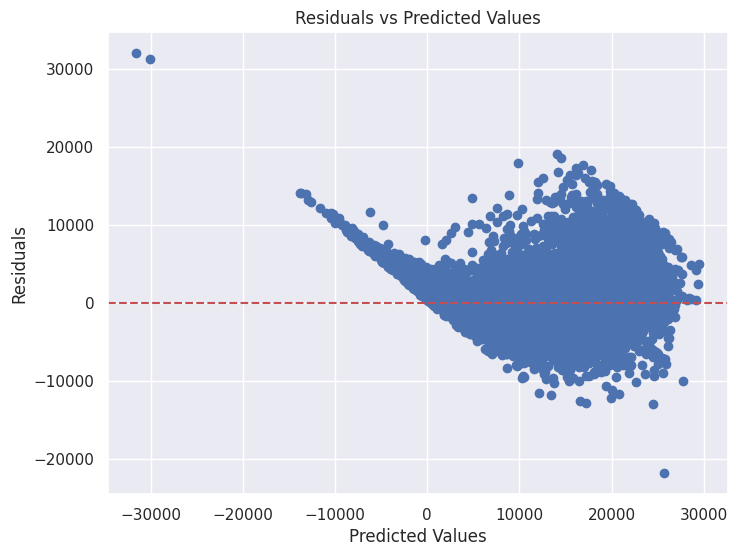

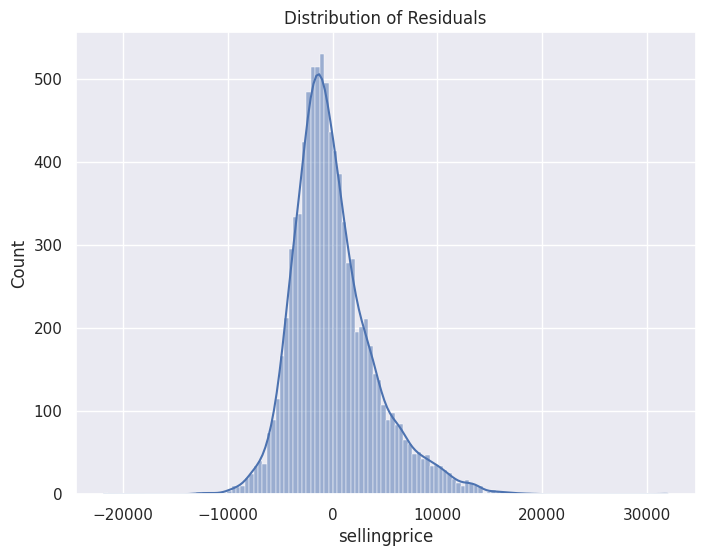

Adjusted R-squared: 0.73


In [ ]:

Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows that are outliers based on the IQR for selling price
df_no_outliers = df[~((df['sellingprice'] < (Q1 - 1.5 * IQR)) | (df['sellingprice'] > (Q3 + 1.5 * IQR)))]

# Print the new shape of the data
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

# Encode categorical variables after outlier removal
df_encoded = pd.get_dummies(df_no_outliers, columns=['make', 'body', 'transmission'], drop_first=True)

# Select features and target variable
X = df_encoded[['year', 'odometer', 'condition'] + [col for col in df_encoded.columns if 'make_' in col or 'body_' in col or 'transmission_' in col]]
y = df_encoded['sellingprice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance: \n MSE: {mse}, R-squared: {r2}")

# Plotting residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

# Adjusted R-squared
n = len(y_test)  # number of samples
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.2f}")



In this analysis, we built a linear regression model to predict car selling prices using features like make, body type, year, odometer, condition, and transmission. Initially, the dataset had 46,578 entries, but after removing outliers using the Interquartile Range (IQR) method, it was reduced to 45,189 entries. Outliers were removed to improve model reliability, as they can distort regression performance.

After processing categorical variables using one-hot encoding and selecting relevant features, we split the data into training and testing sets (80/20). The model achieved a Mean Squared Error (MSE) of 15,517,268.53 and an R-squared value of 0.736, meaning it explained 73.6% of the variance in car prices. The Adjusted R-squared value was 0.73, confirming consistent performance when accounting for multiple predictors.

The Residuals vs. Predicted Values plot reveals some issues with the model. Ideally, residuals should be randomly scattered around zero without any clear pattern. However, the funnel shape in the residuals suggests that the model struggles more with predicting prices at higher ranges, likely due to heteroscedasticity (non-constant variance in residuals). The **Distribution of Residuals** plot further highlights that the residuals are slightly skewed, which indicates that the model may still not be fully capturing the complexity of the data. While most residuals cluster around zero, there are some extreme values, meaning that for certain cars, the model either significantly overestimated or underestimated the price.

In summary, the linear regression model performs moderately well, explaining around 73% of the variability in car prices, but it still struggles with higher-priced vehicles and has some unexplained variance. To improve the model, we could explore more sophisticated approaches, such as regularization techniques (e.g., Ridge or Lasso regression) or non-linear models like decision trees or random forests. These techniques could handle outliers and complex patterns in the data better, potentially increasing the accuracy of predictions. Despite these limitations, the current model provides a decent starting point for predicting used car prices, but further refinements are necessary to make it more robust, particularly for higher-priced cars.

Comparison between models:

Model 1 (Outliers Included) had a significantly higher MSE of 31,478,542.31 and a lower R-squared value of 0.67, indicating it explained only 67% of the variability. This model struggled with predicting higher car prices and showed pronounced biases due to the impact of outliers.


Model 2 (Outliers Removed) had a Mean Squared Error (MSE) of 15,517,268.53 and an R-squared value of 0.736, explaining 73.6% of the variability in car prices.

As a result, we would recommend using the second model as it provides better predictions